<a href="https://colab.research.google.com/github/Sha-diya/DataCollection/blob/main/FeatureEngineering/standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],test_size=0.3,
                                                 random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
#data Frame
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
#numpy array
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


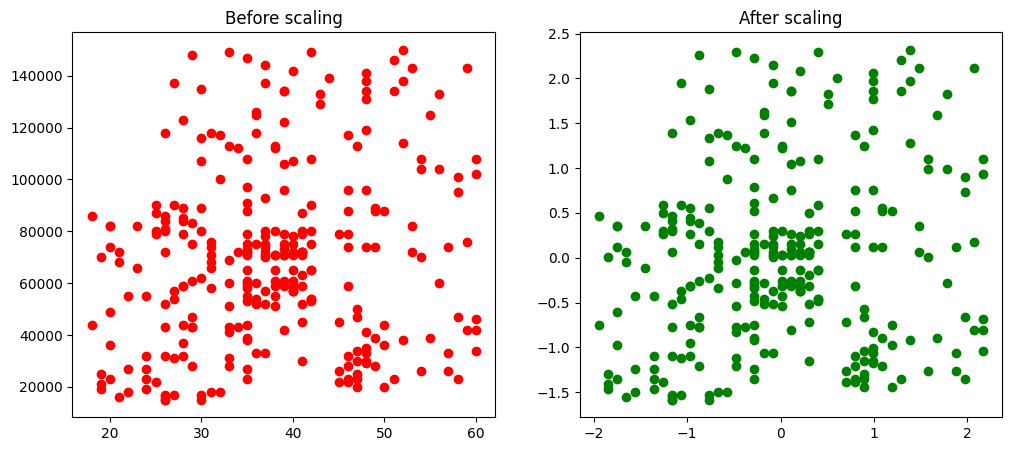

In [ ]:
fig, (ax1,ax2)=plt.subplots( ncols=2,figsize= (12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
ax1.set_title("Before scaling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='green')
ax2.set_title("After scaling")
plt.show()

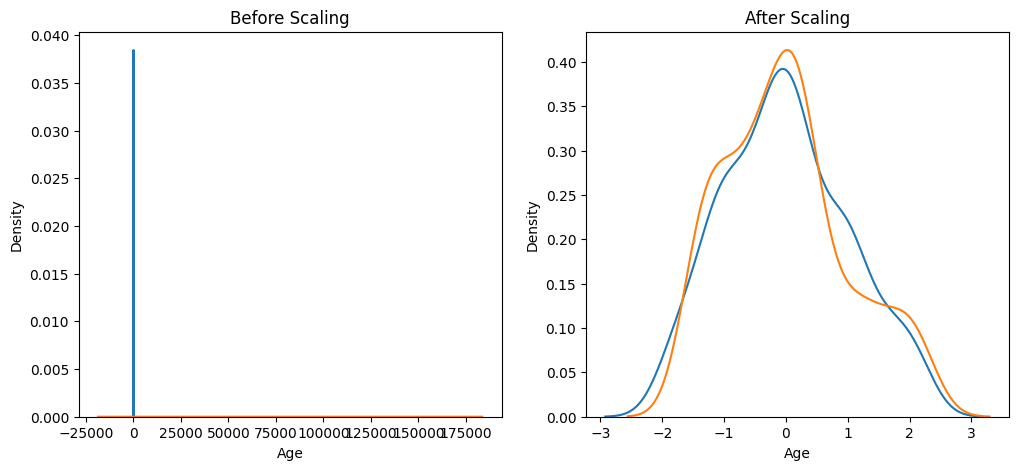

In [ ]:
#ploting PDF(Probability density Function)
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

<Axes: title={'center': 'Age distribution after scaling'}, xlabel='Age', ylabel='Density'>

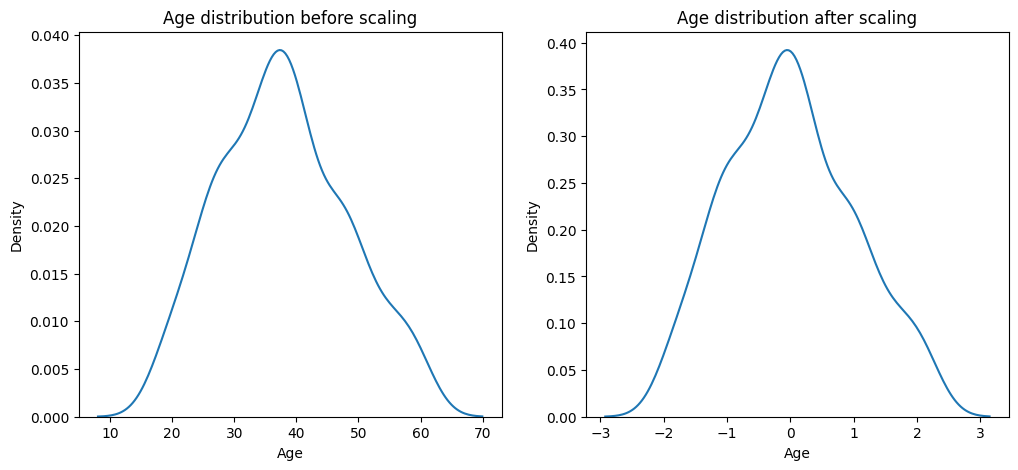

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Age distribution before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("Age distribution after scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

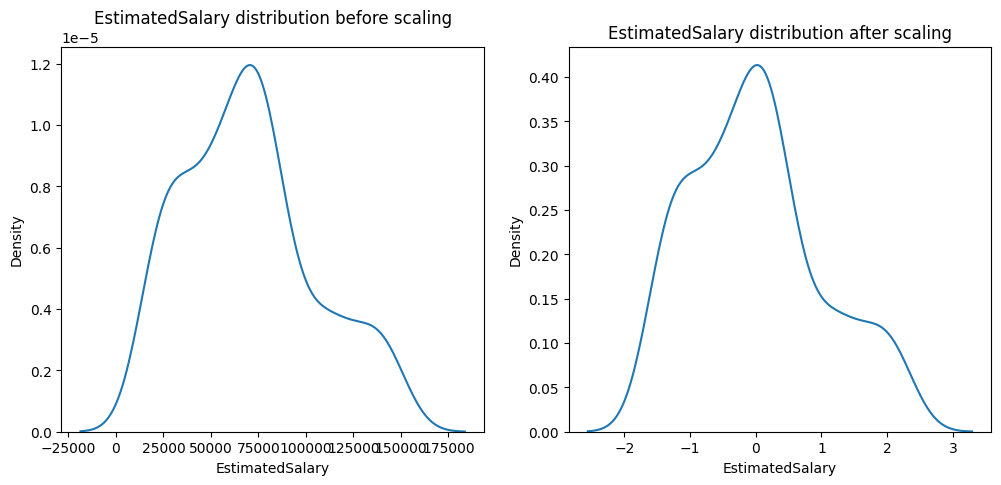

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("EstimatedSalary distribution before scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("EstimatedSalary distribution after scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr_scaled= LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Acctual",accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))

Acctual  0.875
Scaled 0.8666666666666667
